# Machine Learning

First we will evaluate several supervised machine learning techniques with default hyperparameters. Then we will perform hyperparameter tuning on the best peforming default estimators.

The training will be done on 67% of the data. The remaining 33% will be our test set.

In [145]:
import pandas as pd
import numpy as np

In [146]:
df = pd.read_csv('data/final_spotify_data.csv')

In [186]:
## FIRST NEED TO PUT GENRES INTO NUMERICAL CLASSES 

g = ['workout', 'chill', 'party', 'focus']

df['labels'] = df['playlist']

d = dict(zip(g, range(0,4)))

df['labels'] = df['labels'].map(d, na_action='ignore')


In [187]:
from sklearn.model_selection import train_test_split

## SPLIT INTO TRAINING AND TEST

X = df.drop(['labels', 'playlist','id','name','uri_x'], axis = 1)
y = df['labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Random Forest

In [188]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report,confusion_matrix, accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, roc_curve)
### STANDARD PARAMETERS ###
rfclf = RandomForestClassifier()
rfclf.fit(X_train, y_train)

y_pred = rfclf.predict(X_test)

print('\n Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
print("Accuracy:", (accuracy_score(y_test,y_pred)))



 Confusion Matrix:
 [[113  11  55   1]
 [ 14 137   9  13]
 [ 64  13 105   0]
 [  9   9   4 153]]
Accuracy: 0.7154929577464789


c:\users\amand\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Support Vector Machine

In [192]:
from sklearn.svm import SVC

# scale data for svm 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svmclf = SVC()
svmclf = svmclf.fit(X_train_scaled, y_train)
svm_pred = svmclf.predict(X_test_scaled)
  

print('\n Confusion Matrix:\n',confusion_matrix(y_test,svm_pred))
print("Accuracy:", (accuracy_score(y_test,svm_pred)))


 Confusion Matrix:
 [[ 99   7  72   2]
 [  6 133  14  20]
 [ 53   7 122   0]
 [  5  10   5 155]]
Accuracy: 0.7169014084507043


c:\users\amand\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\amand\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
c:\users\amand\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


### Naive Bayes

In [163]:
# naive bayes

from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(X_train_scaled, y_train) 
gnb_predictions = gnb.predict(X_test_scaled) 
  

print('\n Confusion Matrix:\n',confusion_matrix(y_test,gnb_predictions))
print("Accuracy:", (accuracy_score(y_test, gnb_predictions)))


 Confusion Matrix:
 [[ 90   5  81   4]
 [  8 129  22  14]
 [ 42  11 128   1]
 [ 17  25   3 130]]
Accuracy: 0.671830985915493


### KNN

In [164]:
from sklearn.neighbors import KNeighborsClassifier

Knnclf = KNeighborsClassifier(n_neighbors=3)
Knnclf.fit(X_train_scaled, y_train)

knn_predictions = Knnclf.predict(X_test_scaled)

print('\n Confusion Matrix:\n',confusion_matrix(y_test,knn_predictions))
print("Accuracy:", (accuracy_score(y_test, knn_predictions)))


 Confusion Matrix:
 [[107   7  66   0]
 [ 22 125  11  15]
 [ 73   7 101   1]
 [  9  17   4 145]]
Accuracy: 0.6732394366197183


### XGBOOST

In [194]:
#XGBOOST
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train_scaled, y_train)
xgb_pred = xgb.predict(X_test_scaled)

print('\n Confusion Matrix:\n',confusion_matrix(y_test,xgb_pred))
print("Accuracy:", (accuracy_score(y_test,xgb_pred)))


 Confusion Matrix:
 [[102   9  68   1]
 [ 10 138  11  14]
 [ 42   5 134   1]
 [  3   8   3 161]]
Accuracy: 0.7535211267605634


### Default Estimators Accuracy Scores

In [195]:
print("Random Forest:", "%.2f%%" %(accuracy_score(y_test,y_pred)*100))
print("SVM:", "%.2f%%" %(accuracy_score(y_test,svm_pred)*100))
print("Naive Bayes:", "%.2f%%" %(accuracy_score(y_test,gnb_predictions)*100))
print("KNN:", "%.2f%%" %(accuracy_score(y_test,knn_predictions)*100))
print("XGBoost:", "%.2f%%" %(accuracy_score(y_test,xgb_pred)*100))

Random Forest: 71.55%
SVM: 71.69%
Naive Bayes: 67.18%
KNN: 67.32%
XGBoost: 75.35%


Random Forest, SVM and XGBoost models had the best performance with their default hyperparameters. Now let's tune these models.


### Tuned Random Forest

In [166]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': np.arange(20,200,10), # Number of trees in random forest
              'max_features': ['auto', 'sqrt']} # Method of selecting samples for training each tree



cv = GridSearchCV(rfclf, param_grid, cv=5)
cv.fit(X_train, y_train)
print(cv.best_params_)

{'max_features': 'sqrt', 'n_estimators': 140}


In [167]:
ne = cv.best_params_['n_estimators']
mf = cv.best_params_['max_features']

rfclf_tuned = RandomForestClassifier(n_estimators=ne, max_features=mf)

rfclf_tuned.fit(X_train, y_train)

rfclf_pred = rfclf_tuned.predict(X_test)

print('\n Confusion Matrix:\n',confusion_matrix(y_test,rfclf_pred))
print("Accuracy:", (accuracy_score(y_test,rfclf_pred)))


 Confusion Matrix:
 [[ 99   8  73   0]
 [ 12 141   7  13]
 [ 44   6 131   1]
 [  5   7   6 157]]
Accuracy: 0.7436619718309859


Our accuracy score for Random Forest increased by 3.52%.

### Tuned SVM

In [168]:
param_grid_svm = {'C': np.arange(1,2,.01)}

grid_search = GridSearchCV(SVC(gamma='auto'), param_grid_svm, cv=5)

grid_search.fit(X_train_scaled, y_train)
print(grid_search.best_params_)


{'C': 1.3700000000000003}


In [169]:
svmclf_tuned = SVC(C=1.3700000000000003, gamma='auto')

svmclf_tuned.fit(X_train_scaled, y_train)

svm_tuned_pred = svmclf_tuned.predict(X_test_scaled)

print('\n Confusion Matrix:\n',confusion_matrix(y_test,svm_tuned_pred))
print("Accuracy:", (accuracy_score(y_test,svm_tuned_pred)))


 Confusion Matrix:
 [[102   7  69   2]
 [  7 134  14  18]
 [ 51   8 123   0]
 [  6   9   4 156]]
Accuracy: 0.7253521126760564


Our accuracy score increased by 0.85% by just tuning 'C'.


### Tuned XGBoost

We tune max_depth and min_child_weight first, as they will have the highest impact on model outcome. These parameters can be used to control the complexity of the trees. It is important to tune them together in order to find a good trade-off between model bias and variance.

In [198]:
# tune XGBoost
param_grid3 = { 'max_depth':range(1,5,1), 'min_child_weight':range(1,5,1)}


grid_search_XG = GridSearchCV(XGBClassifier(), param_grid3, cv=5)

grid_search_XG.fit(X_train_scaled, y_train)
print(grid_search_XG.best_params_, grid_search_XG.best_score_)


{'max_depth': 2, 'min_child_weight': 2} 0.7255038220986796


In [199]:
xgb_tuned = XGBClassifier(
 max_depth=2,
 min_child_weight=2,
)


xgb_tuned.fit(X_train_scaled, y_train)

xgb_pred2 = xgb_tuned.predict(X_test_scaled)

print('\n Confusion Matrix:\n',confusion_matrix(y_test,xgb_pred2))
print("Accuracy:", (accuracy_score(y_test,xgb_pred2)))


 Confusion Matrix:
 [[106   8  65   1]
 [ 11 137  10  15]
 [ 45   7 129   1]
 [  3  10   2 160]]
Accuracy: 0.7492957746478873


Since tuning the hyperparameters for XGBoost is not improving accuracy score. I will go ahead and see if I have improve the model by implementing feature selection. 

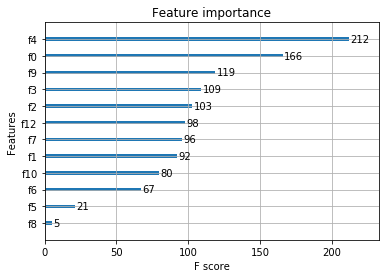

In [200]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# plot feature importance
plot_importance(xgb_tuned)
plt.show()

In [201]:
#adapted from https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/
from numpy import sort
from sklearn.feature_selection import SelectFromModel

thresholds = sort(xgb_tuned.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(xgb_tuned, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train_scaled)
    # train model
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(X_test_scaled)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Thresh=0.000, n=13, Accuracy: 75.35%
Thresh=0.018, n=12, Accuracy: 75.49%
Thresh=0.019, n=11, Accuracy: 75.21%
Thresh=0.021, n=10, Accuracy: 73.80%
Thresh=0.031, n=9, Accuracy: 73.66%
Thresh=0.066, n=8, Accuracy: 73.38%
Thresh=0.067, n=7, Accuracy: 72.11%
Thresh=0.076, n=6, Accuracy: 71.97%
Thresh=0.099, n=5, Accuracy: 70.70%
Thresh=0.099, n=4, Accuracy: 68.03%
Thresh=0.109, n=3, Accuracy: 66.48%
Thresh=0.177, n=2, Accuracy: 63.80%
Thresh=0.219, n=1, Accuracy: 51.27%


Optimal threshold is using 12 features. I will revalute the model with this threshold.

In [203]:
selection = SelectFromModel(xgb_tuned, threshold=0.018, prefit=True)
select_X_train = selection.transform(X_train_scaled)
# train model
selection_model = XGBClassifier()
selection_model.fit(select_X_train, y_train)
# eval model
select_X_test = selection.transform(X_test_scaled)
y_pred = selection_model.predict(select_X_test)

print('\n Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
print("Accuracy:", (accuracy_score(y_test,y_pred)))


 Confusion Matrix:
 [[103   9  67   1]
 [ 10 138  11  14]
 [ 42   5 134   1]
 [  3   8   3 161]]
Accuracy: 0.7549295774647887


With removing a feature, the performance improved by 0.15%.